<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/Iron_Ore_Froth_Flotation_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Quality Prediction of Iron Ore Mining Process**

Froth flotation is an important concentration process. This process can be used to separate any two different particles and operated by the surface chemistry of the particles. In flotation, bubbles are introduced into a pulp and the bubbles rise through the pulp. In the process, hydrophobic particles become bound to the surface of the bubbles. The driving force for this attachment is the change in the surface free energy when the attachment occurs. These bubbles rise through the slurry and are collected from the surface. To enable these particles to attach, careful consideration of the chemistry of the pulp needs to be made. 

In the iron ore mining processing, in order to achieve the desired quality in the froth flotation processing plant, stakeholders rely on conventional laboratory test technique which usually takes more than two hours to ascertain the two variables of interest. Such a substantial dead time makes it difficult to put the inherent stochastic nature of the plant system in steady-state.
Thus, the present study aims to evaluate the feasibility of using machine learning algorithms to predict the percentage of silica concentrate (SiO2) in the froth flotation processing plant in real-time. The predictive model has been constructed using iron ore mining froth flotation system dataset obtain from Kaggle. Different feature selection methods including Random Forest and backward elimination technique were applied to the dataset to extract significant features. The selected features were then used in Multiple Linear Regression, Random Forest models and the prediction accuracy of all the models have been evaluated and compared with each other.

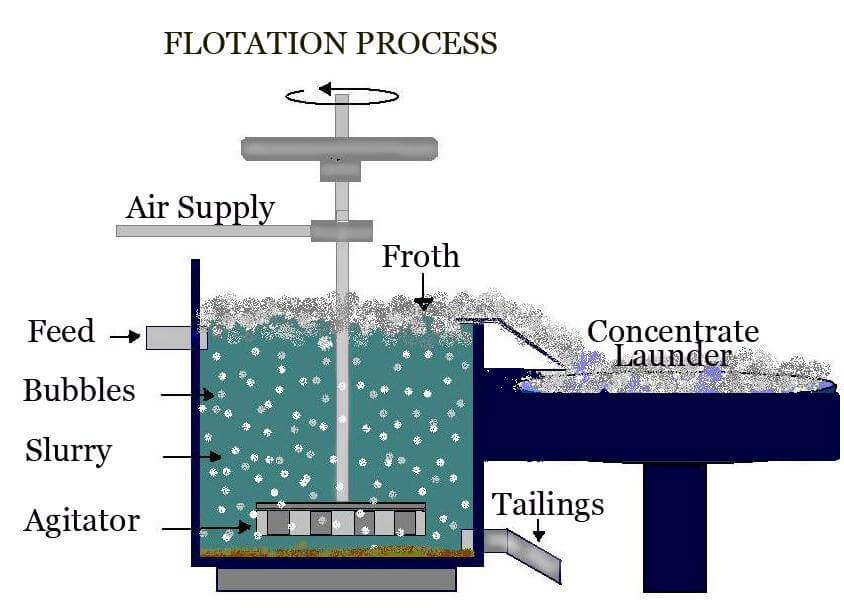

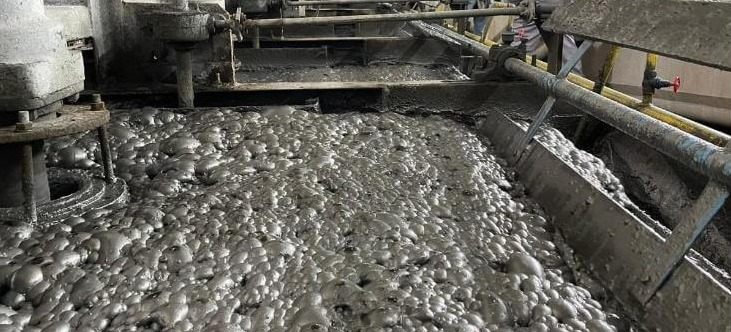

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Flotation/

df = pd.read_csv("Flotation_Plant.csv")
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

**Column Definitions**:

- **Date**: Data collection time.
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore.
- **Amina Flow**: Collector chemical for Silica containing ore.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step.
- **Ore Pulp pH**: pH.
- **Ore Pulp Density**: The solid percent of ore fed to flotation columns.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: The amount of air fed to the flotations columns to frothing.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Showing float thickness of flotation columns.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore

In [19]:
df.shape

(737453, 24)

In [20]:
df_datatype = pd.concat([df.dtypes, df.nunique(),
                         round(df.nunique()*100/len(df), 2),
                         df.isnull().sum(),
                         round(df.isnull().sum()*100/len(df),2)],
                        axis=1)

df_datatype.columns = ['data type',
                       'No. of categories',
                       'No. of categories %',
                       'missing values',
                       'missing values %']

df_datatype.sort_values(by='missing values %',
                        ascending=False, inplace=True)
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
date,object,4097,0.56,0,0.0
% Iron Feed,object,278,0.04,0,0.0
% Iron Concentrate,object,38696,5.25,0,0.0
Flotation Column 07 Level,object,295667,40.09,0,0.0
Flotation Column 06 Level,object,301502,40.88,0,0.0
Flotation Column 05 Level,object,276051,37.43,0,0.0
Flotation Column 04 Level,object,309264,41.94,0,0.0
Flotation Column 03 Level,object,322315,43.71,0,0.0
Flotation Column 02 Level,object,331189,44.91,0,0.0
Flotation Column 01 Level,object,299573,40.62,0,0.0
